In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('douban.csv', encoding='GB18030')

In [6]:
num = data['评分'].value_counts()

Text(0.5, 1.0, '《流浪地球》豆瓣短评评分分数分布')

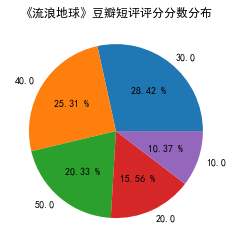

In [8]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 解决中文乱码的问题
plt.pie(num, autopct='%.2f %%', labels=num.index)
plt.title('《流浪地球》豆瓣短评评分分数分布')

In [9]:
num = data['发表时间'].apply(lambda x: x.split(' ')[0]).value_counts()  # x中输入的内容就是data["发表时间"]中的内容
num = num.sort_index()  # 按照时间的顺序进行排序

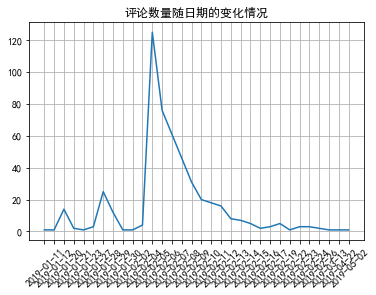

In [10]:
plt.plot(range(len(num)), num)
plt.xticks(range(len(num)), num.index, rotation=45)  # 设置横坐标的值为对应的日期
plt.title('评论数量随日期的变化情况')
plt.grid()  # 添加网格背景

In [12]:
num = pd.to_datetime(data['发表时间']).apply(lambda x: x.hour).value_counts()  # to_datetime方法用于将数据转换为时间格式,提取小时数
num = num.sort_index()

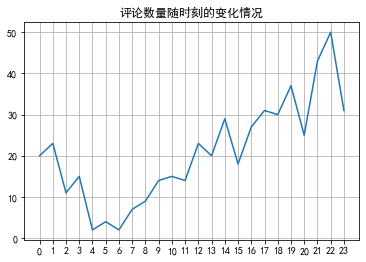

In [13]:
# 绘制评论数量随时间的变化
plt.plot(range(len(num)), num)
plt.xticks(range(len(num)), num.index)
plt.title('评论数量随时刻的变化情况')
plt.grid()

In [17]:
data.loc[:, ['发表时间', '评分']]  # 取出所有行的规定两列的数据
data['发表时间'] = data['发表时间'].apply(lambda x: x.split(' ')[0])

In [20]:
# 将发表时间进行去重后按值进行排序然后作为数据框的索引，将评分进行去重然后按照值进行排序然后作为数据框的列名
tmp = pd.DataFrame(0,  # 表示数据框的初始值都是0
                  index=data['发表时间'].drop_duplicates().sort_values(),  # drop_duplicates()用于去重操作，sort_values表示按值进行排序
                  columns=data['评分'].drop_duplicates().sort_values())   

评分,10.0,20.0,30.0,40.0,50.0,NaN
发表时间,,,,,,
2019-01-11,0,0,0,0,0,0
2019-01-12,0,0,0,0,0,0
2019-01-20,0,0,0,0,0,0
2019-01-21,0,0,0,0,0,0
2019-01-23,0,0,0,0,0,0
2019-01-27,0,0,0,0,0,0
2019-01-28,0,0,0,0,0,0
2019-01-29,0,0,0,0,0,0
2019-01-30,0,0,0,0,0,0


In [22]:
for i, j in zip(data['发表时间'], data['评分']):
    tmp.loc[i, j] += 1  # 取出i行j列的数据(就是指定日期i指定评分j的位置)，然后将对应的数据在数据框中的数据加1表示在这个时间段评分相同的数目
tmp = tmp.iloc[:, :-1]  # 去掉最后一个空列，就是去除没有打分的情况

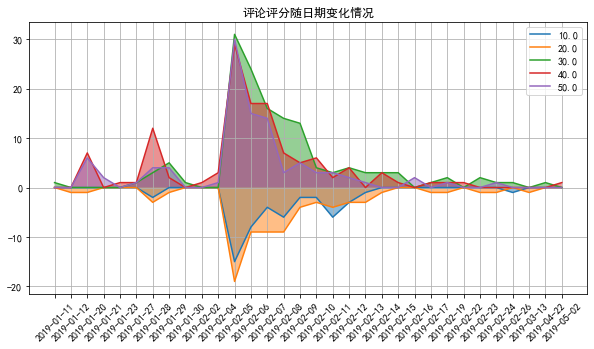

In [24]:
n,m = tmp.shape  # 取出行和列的数目 
plt.figure(figsize=(10, 5))  # 绘制画布的大小
plt.rcParams['axes.unicode_minus'] = False  # 防止坐标轴的负号不显示的问题
for i in range(m):
    plt.plot(range(n), (-1 if i<2 else 1)*tmp.iloc[:, i])  # (-1 if i<2 else 1)表示将前两列(也就是评分小于30的图画在下方) 
    plt.fill_between(range(n), (-1 if i<2 else 1)*tmp.iloc[:, i], alpha=0.5)  # 用内容进行填充，alpha=0.5表示填充的透明度，range(n), (-1 if i<2 else 1)*tmp.iloc[:, i]用来表示要填充的内容
plt.grid()  # 添加网格背景
plt.title('评论评分随日期变化情况')
plt.legend(tmp.columns)  # 添加图标
plt.xticks(range(n), tmp.index, rotation=45)  # 设置横坐标的内容
plt.show()